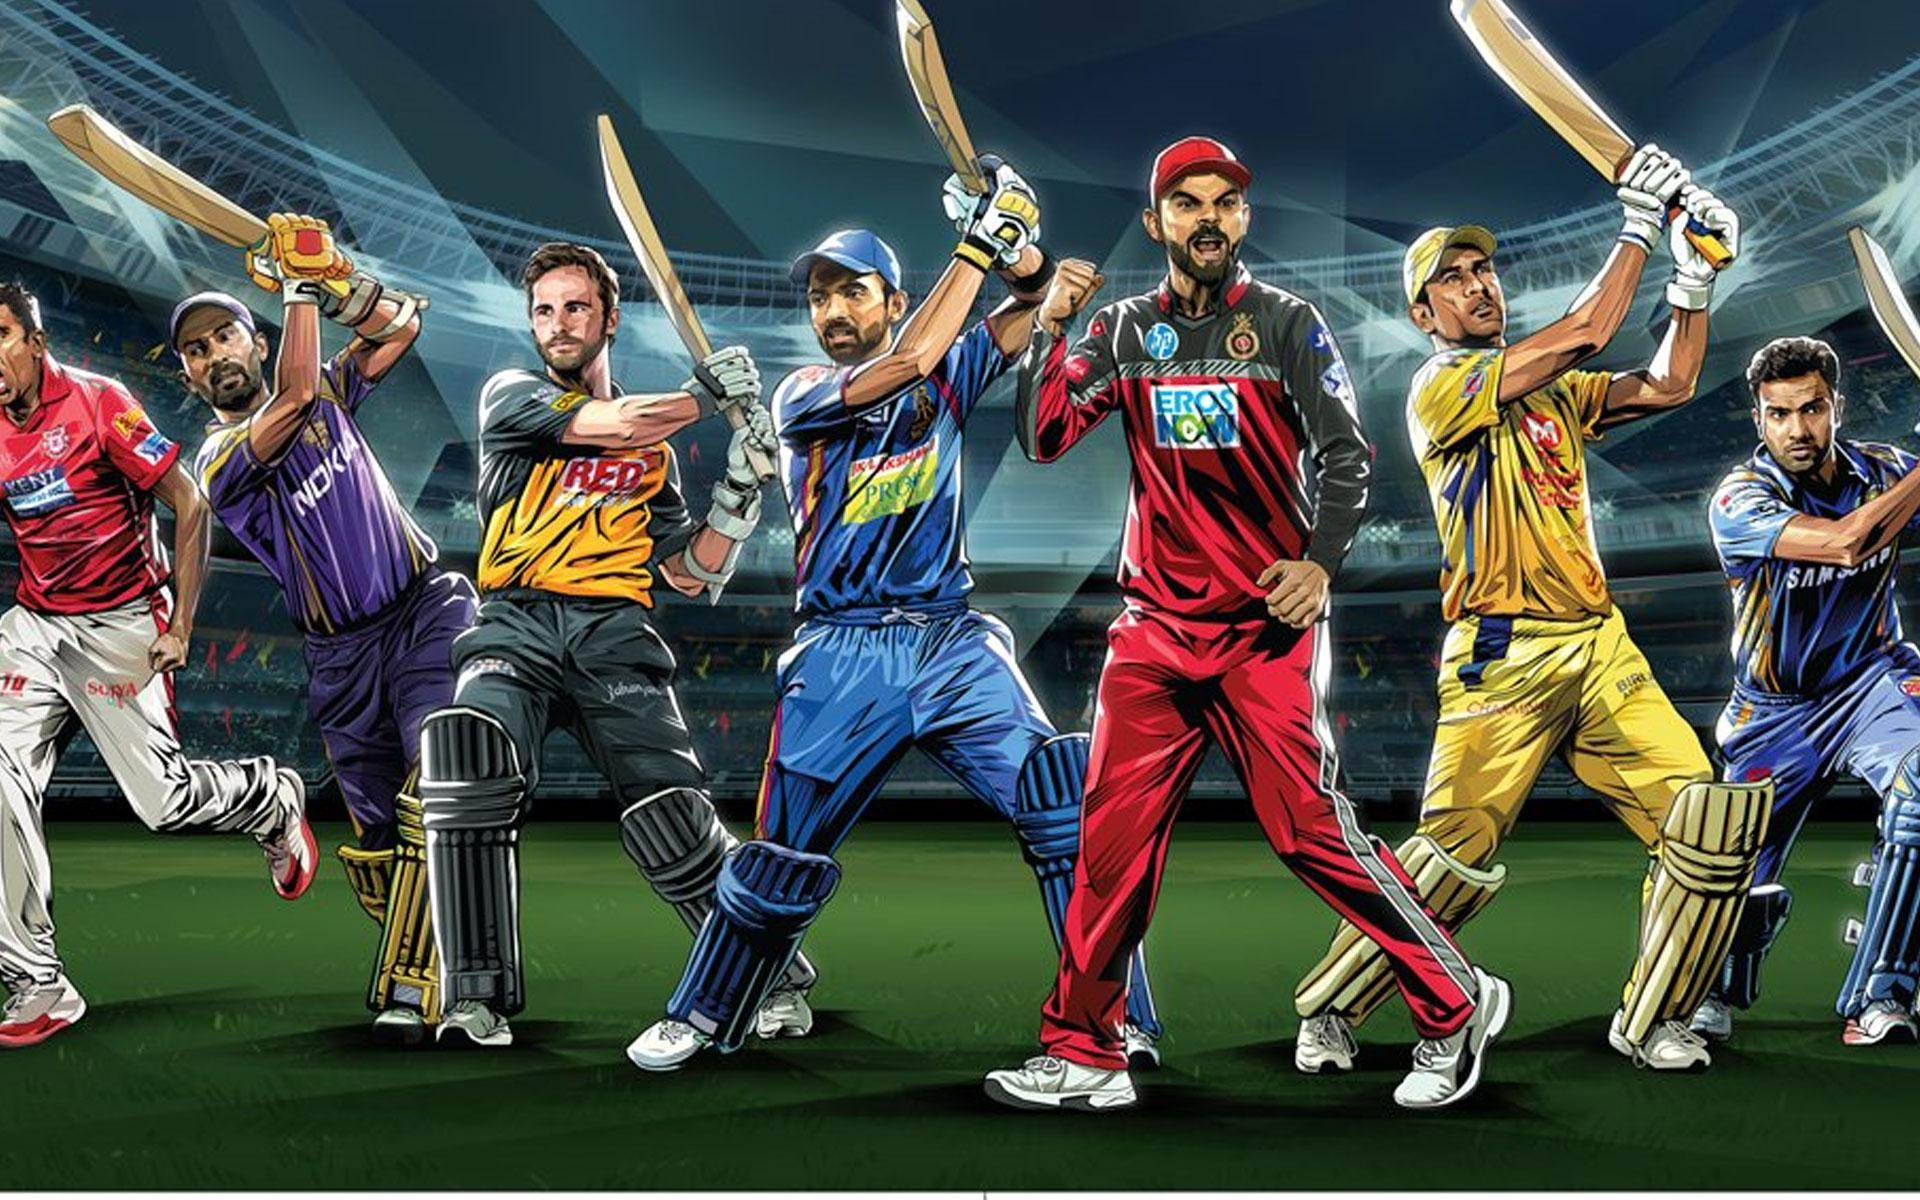

In [112]:
from IPython.display import Image
Image(filename="download.jpg",embed=True)


## Author : Braham Parkash
## Data Science & Business Analytics Internship
##GRIP - The Spark Foundation
## TASK 4 : Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
from matplotlib import style

#Adjusting the size of matplotlib

mpl.rc('figure', figsize = (15 , 15))
mpl.__version__

#Adjusting the style of matplotlib

style.use('ggplot')


In [3]:
deliveries=pd.read_csv('deliveries.csv')
matches=pd.read_csv('matches.csv')

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
print('Data has {} number of rows and {} columns'.format(matches.shape[0],matches.shape[1]))

Data has 756 number of rows and 18 columns


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches.isna().mean()*100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [ ]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
matches.duplicated().sum()

0

In [ ]:
matches.min()

id                                  1
season                           2008
date                         01/04/19
team1             Chennai Super Kings
team2             Chennai Super Kings
toss_winner       Chennai Super Kings
toss_decision                     bat
result                      no result
dl_applied                          0
win_by_runs                         0
win_by_wickets                      0
venue                ACA-VDCA Stadium
dtype: object

In [ ]:
matches.max()

id                              11415
season                           2019
date                         31/03/19
team1             Sunrisers Hyderabad
team2             Sunrisers Hyderabad
toss_winner       Sunrisers Hyderabad
toss_decision                   field
result                            tie
dl_applied                          1
win_by_runs                       146
win_by_wickets                     10
venue                Wankhede Stadium
dtype: object

In [ ]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
const_col=[c for c in matches.columns if matches[str(c)].nunique()==1]

In [ ]:
const_col

[]

In [ ]:
for col in matches.columns:
  print('Number of unique values in {} are : {} '.format(col,matches[str(col)].nunique()))

Number of unique values in id are : 756 
Number of unique values in season are : 12 
Number of unique values in city are : 32 
Number of unique values in date are : 546 
Number of unique values in team1 are : 15 
Number of unique values in team2 are : 15 
Number of unique values in toss_winner are : 15 
Number of unique values in toss_decision are : 2 
Number of unique values in result are : 3 
Number of unique values in dl_applied are : 2 
Number of unique values in winner are : 15 
Number of unique values in win_by_runs are : 89 
Number of unique values in win_by_wickets are : 11 
Number of unique values in player_of_match are : 226 
Number of unique values in venue are : 41 
Number of unique values in umpire1 are : 61 
Number of unique values in umpire2 are : 65 
Number of unique values in umpire3 are : 25 


In [ ]:
matches.season.value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

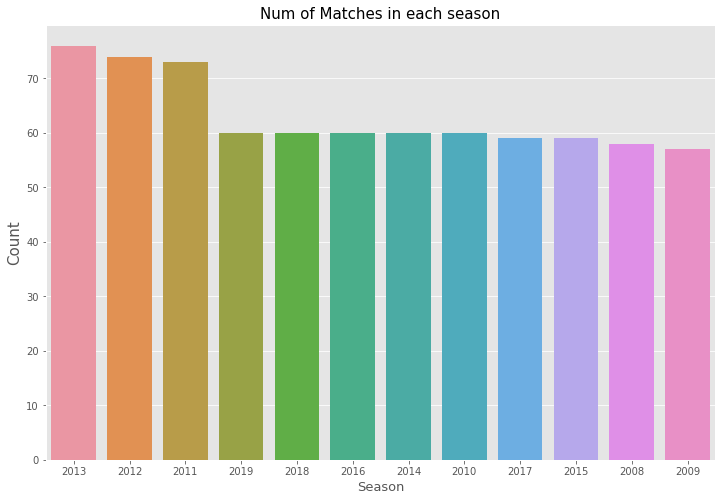

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(matches.season,order=(matches.season.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("Season", fontsize =13)
plt.title('Num of Matches in each season',fontsize=15)
plt.show()

2013 season had the most number of games because 10 teams participated in that season while 2019 had the least num of games

In [ ]:
matches.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
matches[matches.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
matches[matches.season==2014].groupby('city').count()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
city,,,,,,,,,,,,,,,,,
Abu Dhabi,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0
Ahmedabad,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
Bangalore,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
Chandigarh,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Cuttack,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Delhi,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
Hyderabad,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
Kolkata,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
Mumbai,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0


7 city values are missing for 2014 season this could be due to the fact the part of the 2014 IPL was played in UAE. By looking at the venue of the 7 rows we can infer that all games were played in Dubai. So filling missing cities with Dubai

In [ ]:
matches.city.fillna('Dubai',inplace=True)

In [ ]:
matches[matches.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


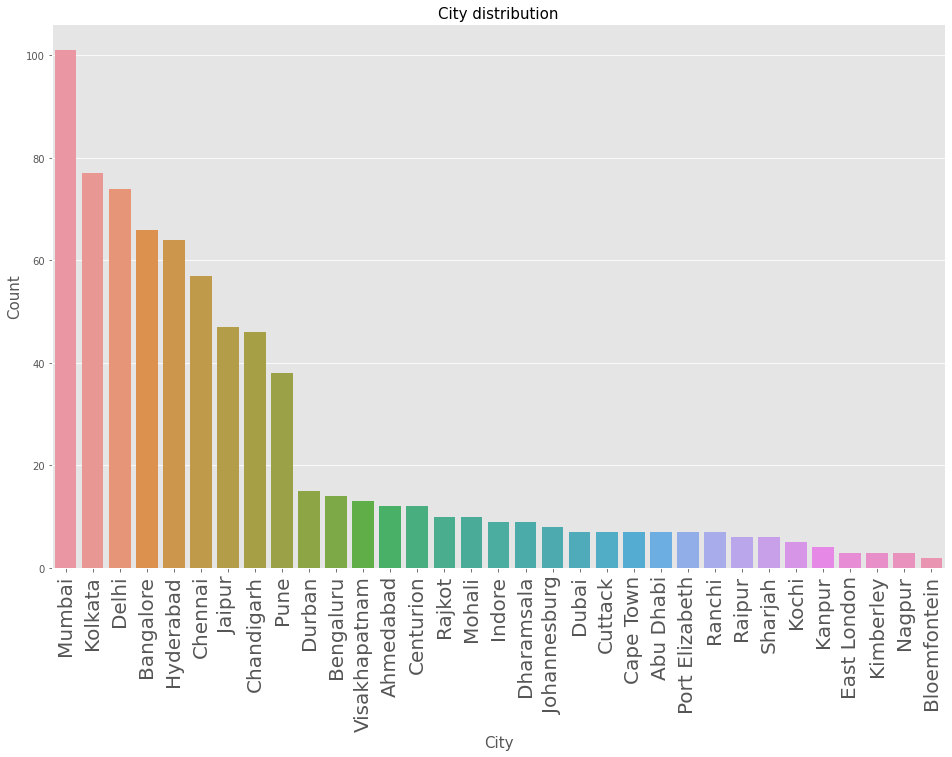

In [ ]:
plt.figure(figsize=(16,10))
sns.countplot(matches.city,order=(matches.city.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("City", fontsize =15)
plt.title('City distribution',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()

In [ ]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

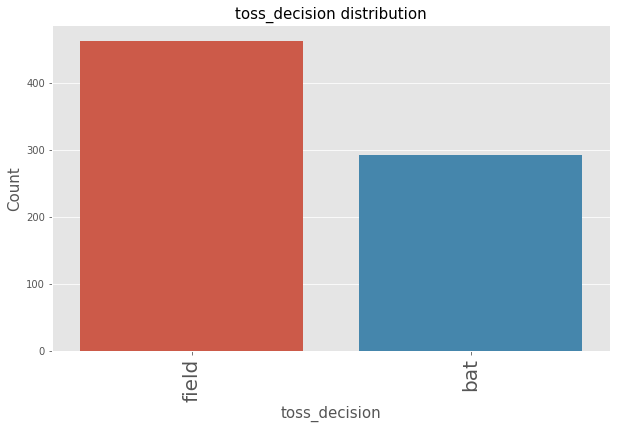

field    463
bat      293
Name: toss_decision, dtype: int64

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(matches.toss_decision,order=(matches.toss_decision.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("toss_decision", fontsize =15)
plt.title('toss_decision distribution',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()
matches.toss_decision.value_counts()

In [12]:
vc=matches.toss_decision.value_counts()
vc.index

Index(['field', 'bat'], dtype='object')

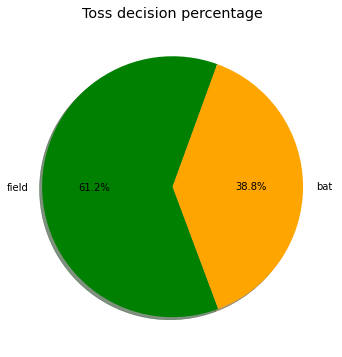

In [16]:
plt.figure(figsize=(10,6))
x=np.array(vc.index)
y=(np.array(vc/vc.sum()))*100
colors=['green','orange']
plt.pie(y, labels=x, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=70)

plt.title("Toss decision percentage")
plt.show()

In most of the matches teams decided to field first after winning the toss.
Teams like to chase it down

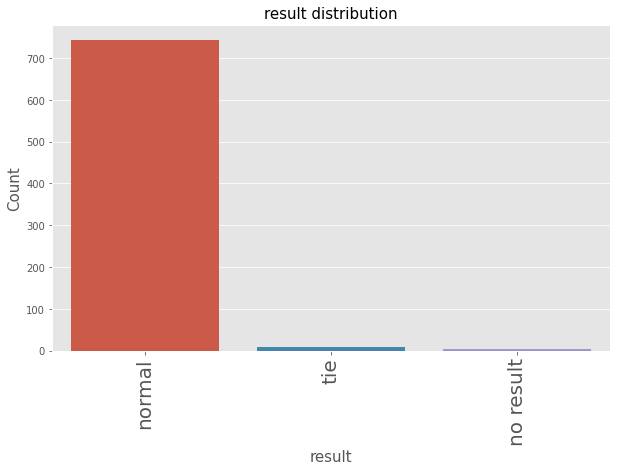

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(matches.result,order=(matches.result.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("result", fontsize =15)
plt.title('result distribution',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()
matches.result.value_counts()

In [ ]:
matches.dl_applied.unique()

array([0, 1])

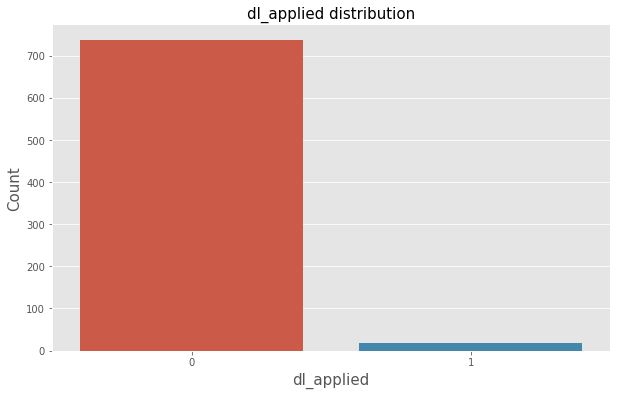

0    737
1     19
Name: dl_applied, dtype: int64

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(matches.dl_applied,order=(matches.dl_applied.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("dl_applied", fontsize =15)
plt.title('dl_applied distribution',fontsize=15)
#plt.xticks(rotation=90,fontsize=20)
plt.show()
matches.dl_applied.value_counts()

dl_applied: Duckworth Lewis used for deciding the winner
only in 19 matches DL was applied.

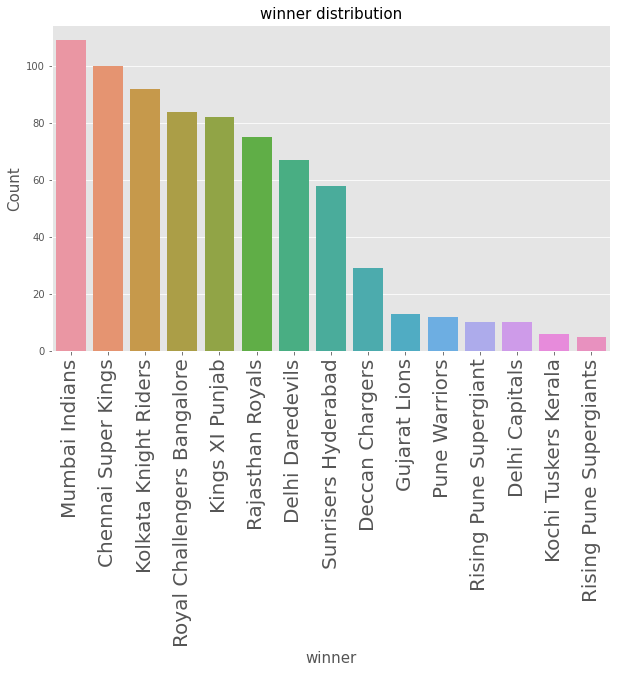

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(matches.winner,order=(matches.winner.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("winner", fontsize =15)
plt.title('winner distribution',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()
matches.winner.value_counts()

Mumbai Indians have won the most matches and is the most successful team of the IPL followed by Chennai Super Kings  abnd KKR

Number of unique player of matches 226:


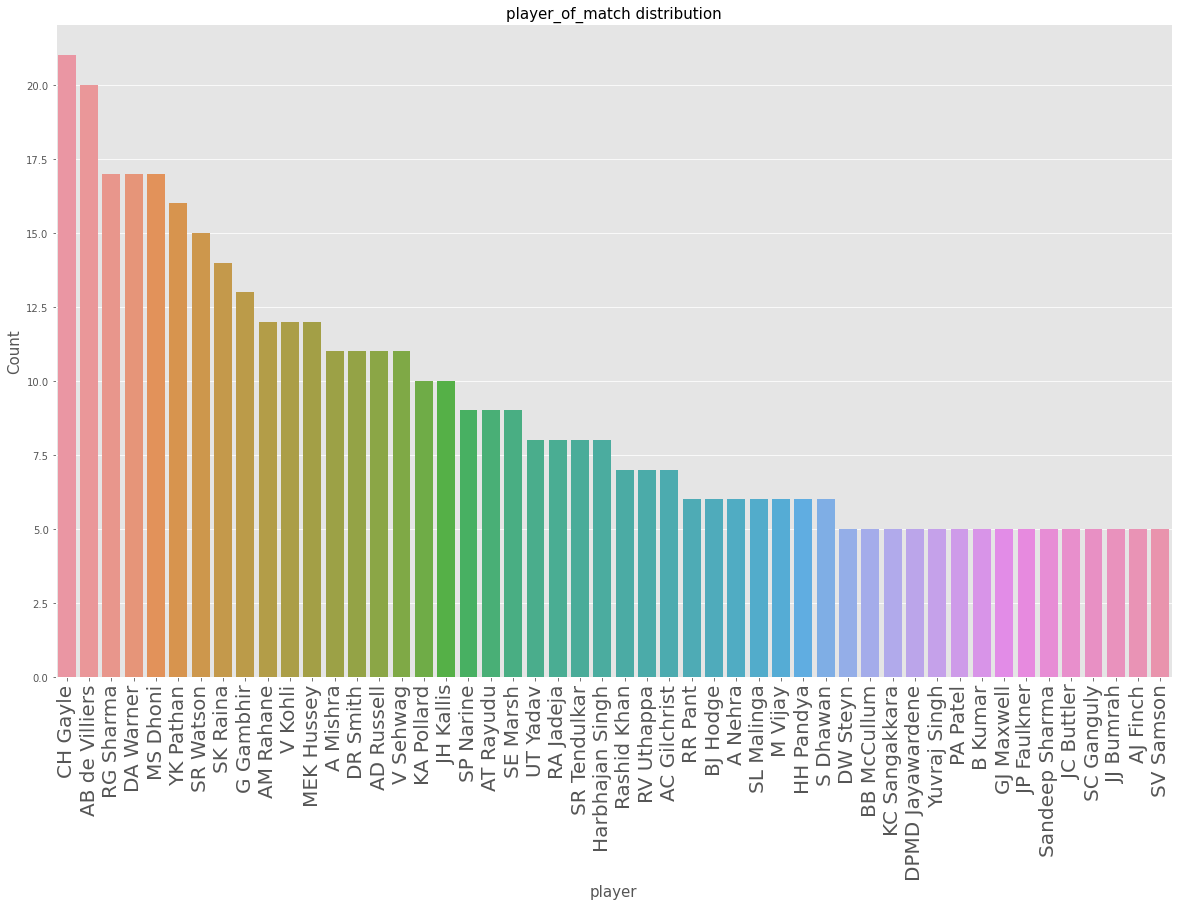

CH Gayle            21
AB de Villiers      20
RG Sharma           17
DA Warner           17
MS Dhoni            17
YK Pathan           16
SR Watson           15
SK Raina            14
G Gambhir           13
AM Rahane           12
V Kohli             12
MEK Hussey          12
A Mishra            11
DR Smith            11
AD Russell          11
V Sehwag            11
KA Pollard          10
JH Kallis           10
SP Narine            9
AT Rayudu            9
SE Marsh             9
UT Yadav             8
RA Jadeja            8
SR Tendulkar         8
Harbhajan Singh      8
Rashid Khan          7
RV Uthappa           7
AC Gilchrist         7
RR Pant              6
BJ Hodge             6
A Nehra              6
SL Malinga           6
M Vijay              6
HH Pandya            6
S Dhawan             6
DW Steyn             5
BB McCullum          5
KC Sangakkara        5
DPMD Jayawardene     5
Yuvraj Singh         5
PA Patel             5
B Kumar              5
GJ Maxwell           5
JP Faulkner

In [ ]:
print("Number of unique player of matches {}:".format(matches.player_of_match.nunique()))

plt.figure(figsize=(20,12))
sns.countplot(matches.player_of_match,order=(matches.player_of_match.value_counts().head(50).index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("player", fontsize =15)
plt.title('player_of_match distribution',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()
matches.player_of_match.value_counts().head(50)


Chris Gayle and AB de Villiers have won the most player of the match awards

Number of unique venues 41:


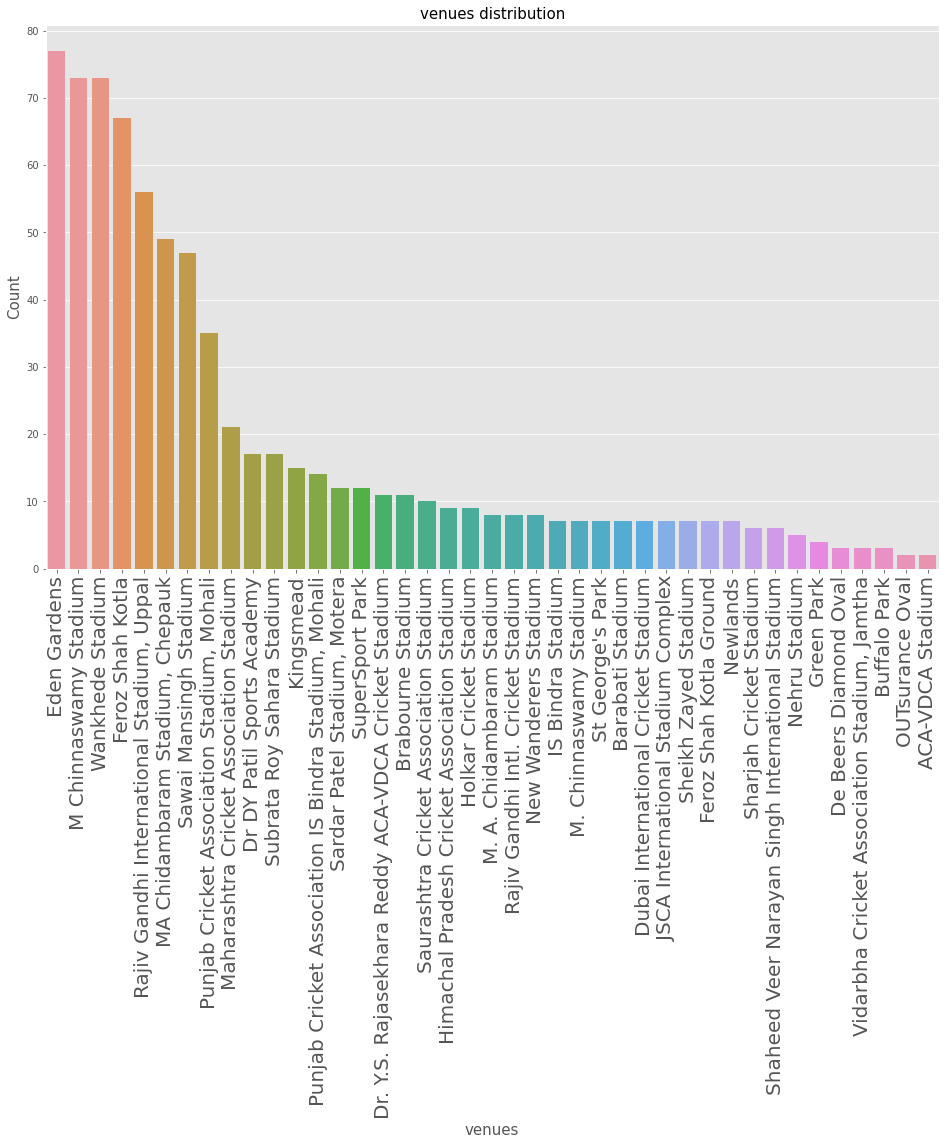

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [ ]:

print("Number of unique venues {}:".format(matches.venue.nunique()))

plt.figure(figsize=(16,10))
sns.countplot(matches.venue,order=(matches.venue.value_counts().index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("venues", fontsize =15)
plt.title('venues distribution',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()
matches.venue.value_counts()



Eden Gardens ,M Chinnaswamy Stadium ,Wankhede Stadium have hosted large number of matches in IPL

Number of unique umpire1  61:


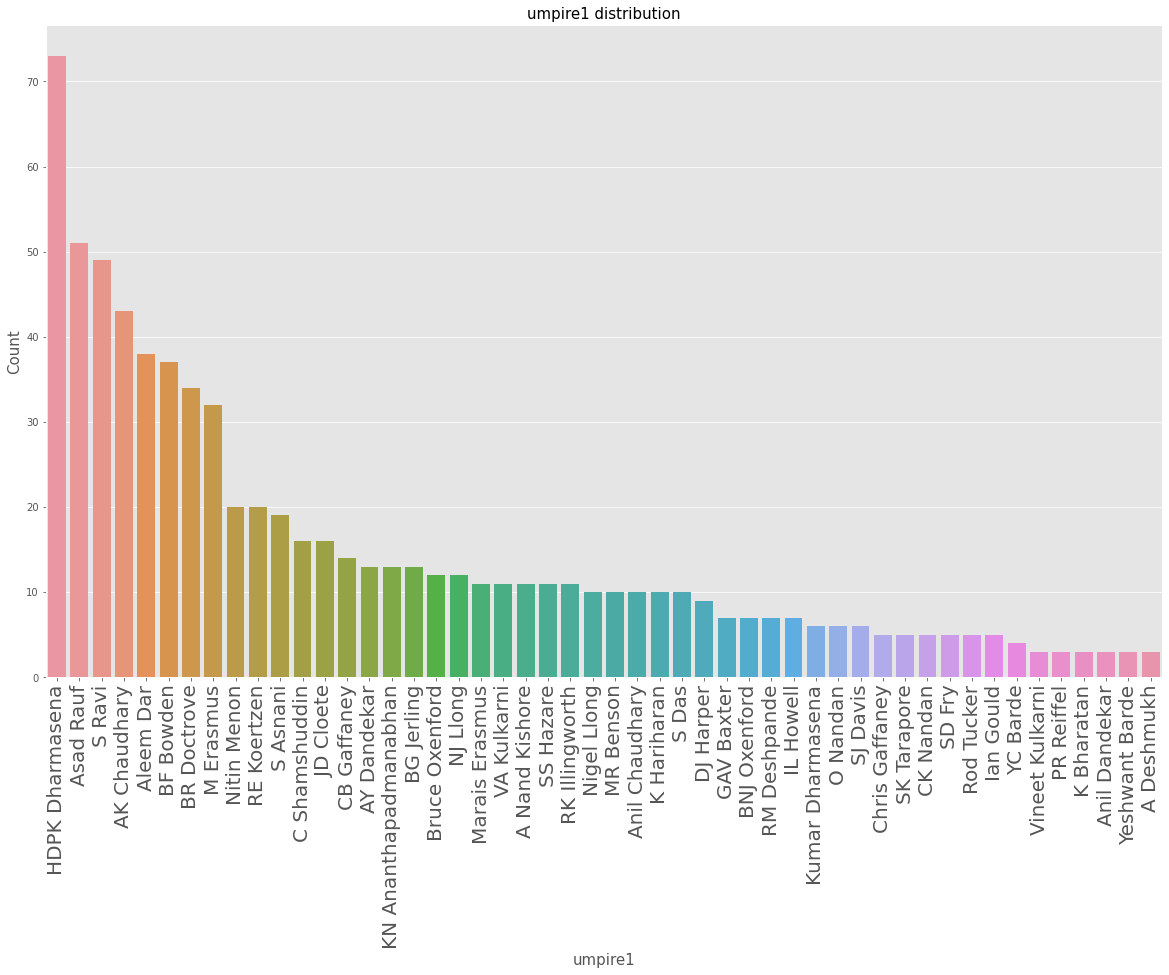

HDPK Dharmasena          73
Asad Rauf                51
S Ravi                   49
AK Chaudhary             43
Aleem Dar                38
BF Bowden                37
BR Doctrove              34
M Erasmus                32
Nitin Menon              20
RE Koertzen              20
S Asnani                 19
C Shamshuddin            16
JD Cloete                16
CB Gaffaney              14
AY Dandekar              13
KN Ananthapadmanabhan    13
BG Jerling               13
Bruce Oxenford           12
NJ Llong                 12
Marais Erasmus           11
VA Kulkarni              11
A Nand Kishore           11
SS Hazare                11
RK Illingworth           11
Nigel Llong              10
MR Benson                10
Anil Chaudhary           10
K Hariharan              10
S Das                    10
DJ Harper                 9
GAV Baxter                7
BNJ Oxenford              7
RM Deshpande              7
IL Howell                 7
Kumar Dharmasena          6
O Nandan            

In [ ]:
print("Number of unique umpire1  {}:".format(matches.umpire1.nunique()))

plt.figure(figsize=(20,12))
sns.countplot(matches.umpire1,order=(matches.umpire1.value_counts().head(50).index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("umpire1", fontsize =15)
plt.title('umpire1 distribution',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()
matches.umpire1.value_counts().head(50)


HDPK Dharmasena has umpired in most macthes as Ist umpire

In [ ]:
matches.umpire3.isna().mean()*100

84.25925925925925

around 84% of values are missing . This could be due to the lack of availability of the information . TV umpire is not seen on the ground

Number of unique umpire2  65:


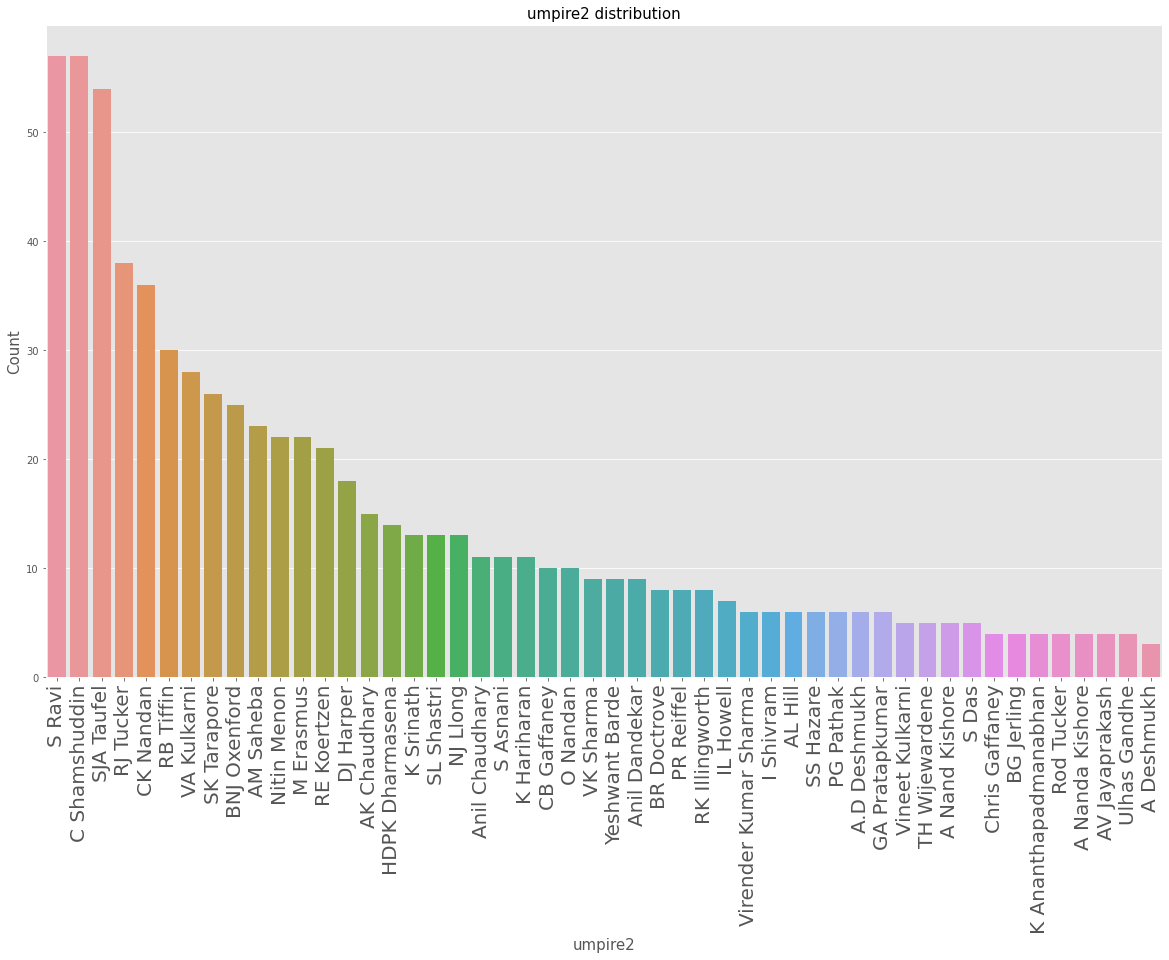

S Ravi                   57
C Shamshuddin            57
SJA Taufel               54
RJ Tucker                38
CK Nandan                36
RB Tiffin                30
VA Kulkarni              28
SK Tarapore              26
BNJ Oxenford             25
AM Saheba                23
Nitin Menon              22
M Erasmus                22
RE Koertzen              21
DJ Harper                18
AK Chaudhary             15
HDPK Dharmasena          14
K Srinath                13
SL Shastri               13
NJ Llong                 13
Anil Chaudhary           11
S Asnani                 11
K Hariharan              11
CB Gaffaney              10
O Nandan                 10
VK Sharma                 9
Yeshwant Barde            9
Anil Dandekar             9
BR Doctrove               8
PR Reiffel                8
RK Illingworth            8
IL Howell                 7
Virender Kumar Sharma     6
I Shivram                 6
AL Hill                   6
SS Hazare                 6
PG Pathak           

In [ ]:
print("Number of unique umpire2  {}:".format(matches.umpire2.nunique()))

plt.figure(figsize=(20,12))
sns.countplot(matches.umpire2,order=(matches.umpire2.value_counts().head(50).index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("umpire2", fontsize =15)
plt.title('umpire2 distribution',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()
matches.umpire2.value_counts().head(50)


S Ravi  ,C Shamshuddin  , SJA Taufel have umpired in most macthes as 2nd umpire

Number of unique umpire3  25:


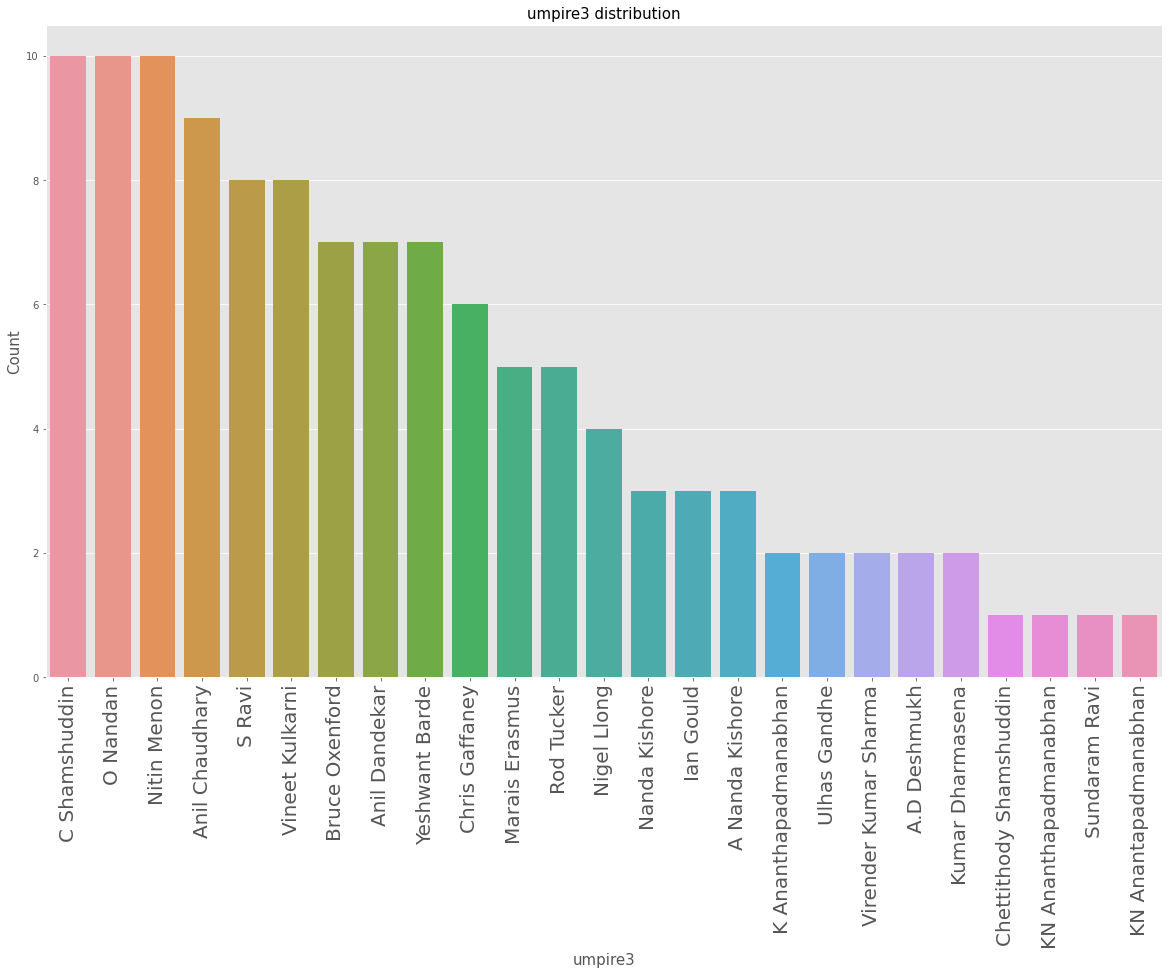

C Shamshuddin              10
O Nandan                   10
Nitin Menon                10
Anil Chaudhary              9
S Ravi                      8
Vineet Kulkarni             8
Bruce Oxenford              7
Anil Dandekar               7
Yeshwant Barde              7
Chris Gaffaney              6
Marais Erasmus              5
Rod Tucker                  5
Nigel Llong                 4
Nanda Kishore               3
Ian Gould                   3
A Nanda Kishore             3
K Ananthapadmanabhan        2
Ulhas Gandhe                2
Virender Kumar Sharma       2
A.D Deshmukh                2
Kumar Dharmasena            2
Chettithody Shamshuddin     1
KN Ananthapadmanabhan       1
Sundaram Ravi               1
KN Anantapadmanabhan        1
Name: umpire3, dtype: int64

In [ ]:
print("Number of unique umpire3  {}:".format(matches.umpire3.nunique()))

plt.figure(figsize=(20,12))
sns.countplot(matches.umpire3,order=(matches.umpire3.value_counts().head(50).index))
plt.ylabel('Count',fontsize=15)
plt.xlabel("umpire3", fontsize =15)
plt.title('umpire3 distribution',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.show()
matches.umpire3.value_counts().head(50)


Bi-Virate Analysis

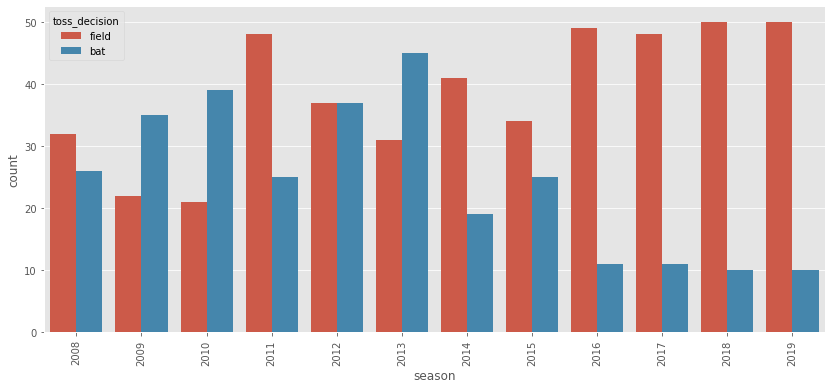

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.xticks(rotation='vertical')
plt.show()

During initial seasons teams preferred batting first to put runs on the board and put the opposition under pressure.

But as it can be seen that players have evolved over time and can handle pressure of the scoreboard teams prefer fielding first after winning the toss in the previous 3-4 seasons

In [19]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [20]:
#Toss vs win

In [29]:
temp=matches['toss_winner']==matches['winner']

In [33]:
temp.value_counts()/temp.value_counts().sum()*100

True     51.984127
False    48.015873
dtype: float64

##Team's Performance

In [34]:
matches[matches['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Delhi Capitals                 37.0
Rising Pune Supergiants        26.5
Rajasthan Royals               26.0
Mumbai Indians                 25.0
Kolkata Knight Riders          24.5
Chennai Super Kings            24.0
Pune Warriors                  23.0
Royal Challengers Bangalore    20.0
Rising Pune Supergiant         20.0
Kings XI Punjab                17.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            15.5
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

In [35]:
matches[matches['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

winner
Kochi Tuskers Kerala           7.5
Sunrisers Hyderabad            7.0
Rising Pune Supergiants        7.0
Royal Challengers Bangalore    6.5
Pune Warriors                  6.5
Delhi Daredevils               6.5
Rising Pune Supergiant         6.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kolkata Knight Riders          6.0
Kings XI Punjab                6.0
Gujarat Lions                  6.0
Deccan Chargers                6.0
Chennai Super Kings            6.0
Delhi Capitals                 5.0
Name: win_by_wickets, dtype: float64

In [36]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [37]:
print('Total Deliveries bowled',deliveries.shape[0])

Total Deliveries bowled 179078


In [38]:
new_df=matches[['id','season']]
new_df=pd.merge(new_df,deliveries,left_on='id',right_on='match_id')

In [39]:
new_df.head()

,id,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [45]:
orange_cap=new_df.groupby(['batsman','season'])['batsman_runs'].sum().reset_index()
orange_cap=orange_cap.sort_values('batsman_runs',ascending=False)
orange_cap=orange_cap.drop_duplicates(subset=['season'],keep='first')

In [46]:
orange_cap

,batsman,season,batsman_runs
1700,V Kohli,2016,973
799,KS Williamson,2018,747
946,MEK Hussey,2013,733
321,CH Gayle,2012,733
388,DA Warner,2019,727
1357,RV Uthappa,2014,660
387,DA Warner,2017,641
1553,SR Tendulkar,2010,618
1474,SE Marsh,2008,616
320,CH Gayle,2011,608


In [51]:
new_df.dismissal_kind.value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [53]:
dismissal_types=[ 'caught', 'bowled', 'lbw', 'caught and bowled','stumped',  'hit wicket']
purple_cap=new_df[new_df['dismissal_kind'].isin(dismissal_types)]


In [58]:
purple_cap=new_df.groupby(['bowler','season'])['dismissal_kind'].count().reset_index()
purple_cap=purple_cap.sort_values('dismissal_kind',ascending=False)
purple_cap=purple_cap.drop_duplicates(subset=['season'],keep='first').sort_values(by='season')

In [62]:
purple_cap.columns=['season','bowler','count_wickets']
purple_cap

,season,bowler,count_wickets
1193,Sohail Tanvir,2008,24
984,RP Singh,2009,26
865,PP Ojha,2010,22
1116,SL Malinga,2011,30
675,M Morkel,2012,30
298,DJ Bravo,2013,34
739,MM Sharma,2014,26
299,DJ Bravo,2015,28
182,B Kumar,2016,24
183,B Kumar,2017,28


# max boundaries by each team in the entire IPL

In [65]:
sixes = deliveries[deliveries['batsman_runs'] == 6]['batting_team'].value_counts().reset_index()
fours = deliveries[deliveries['batsman_runs'] == 4]['batting_team'].value_counts().reset_index()
boundaries = sixes.merge(fours,left_on = 'index', right_on = 'index')
boundaries.columns = [['team_name','4s','6s']]

In [66]:
boundaries

,team_name,4s,6s
0,Royal Challengers Bangalore,1132,2360
1,Mumbai Indians,1096,2588
2,Kings XI Punjab,976,2458
3,Chennai Super Kings,973,2193
4,Kolkata Knight Riders,930,2434
5,Delhi Daredevils,801,2158
6,Rajasthan Royals,681,2035
7,Sunrisers Hyderabad,533,1444
8,Deccan Chargers,400,957
9,Pune Warriors,196,525



# player who hit most boundaries

In [67]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [78]:
t=deliveries[(deliveries['batsman_runs'] == 4) | (deliveries['batsman_runs'] == 6)][['batsman','batsman_runs']].groupby('batsman').count().reset_index().sort_values(ascending = False, by = 'batsman_runs')



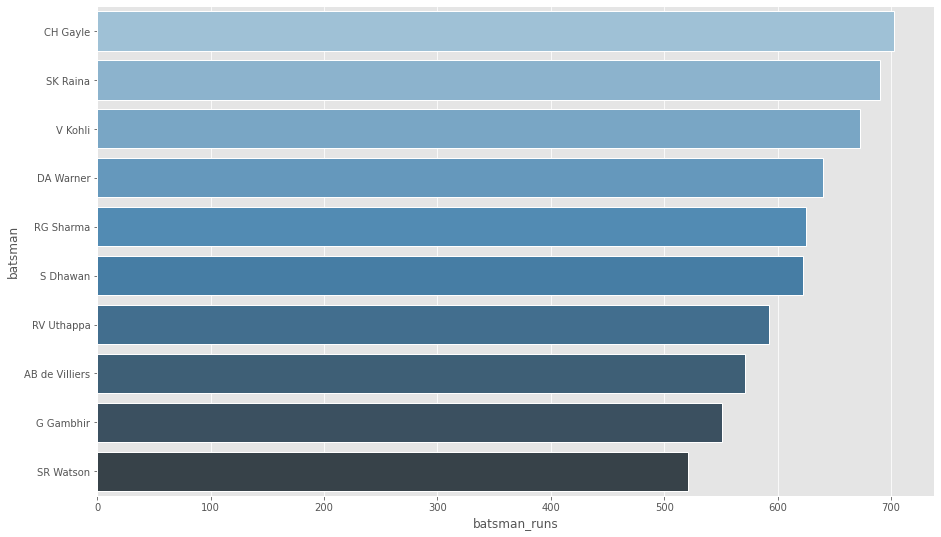

In [80]:
plt.subplots(figsize=(15,9))
sns.set_style("ticks")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = 'batsman_runs', y = 'batsman', data = t[:10],palette="Blues_d")

#Bowler who has given most runs

In [81]:
q=deliveries[['bowler','total_runs']].groupby('bowler').sum().reset_index().sort_values(ascending = False, by = 'total_runs')

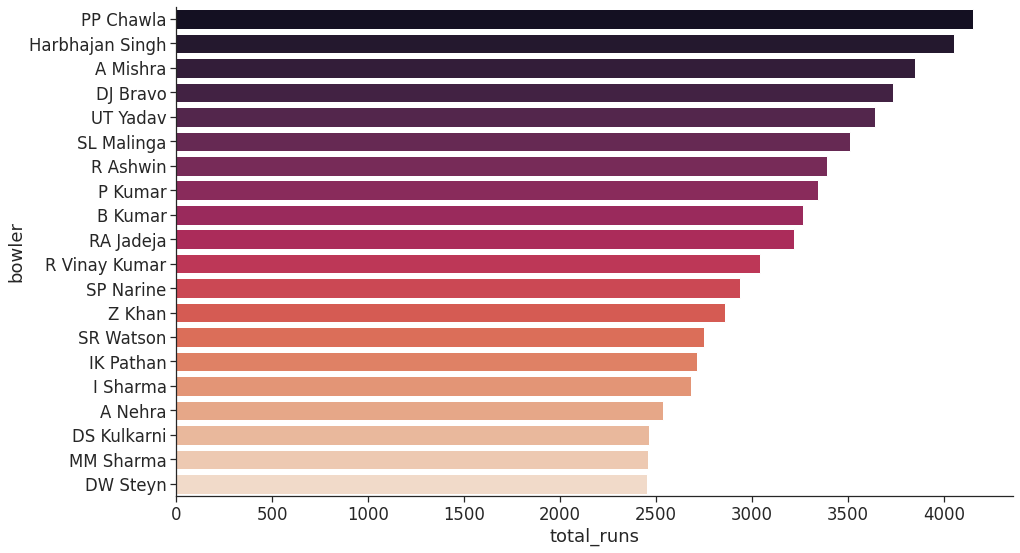

In [84]:
plt.subplots(figsize=(15,9))
sns.set_style("ticks")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = 'total_runs', y = 'bowler', data = q[:20],palette="rocket")

In [94]:
no_ball=deliveries[deliveries['noball_runs']>0][['bowler','noball_runs']].groupby('bowler').count().reset_index().sort_values(ascending = False, by = 'noball_runs')

In [95]:
no_ball

,bowler,noball_runs
152,S Sreesanth,23
76,JJ Bumrah,22
63,I Sharma,21
3,A Mishra,20
174,UT Yadav,18
...,...,...
58,H Gurney,1
65,IK Pathan,1
130,Pankaj Singh,1
66,Imran Tahir,1


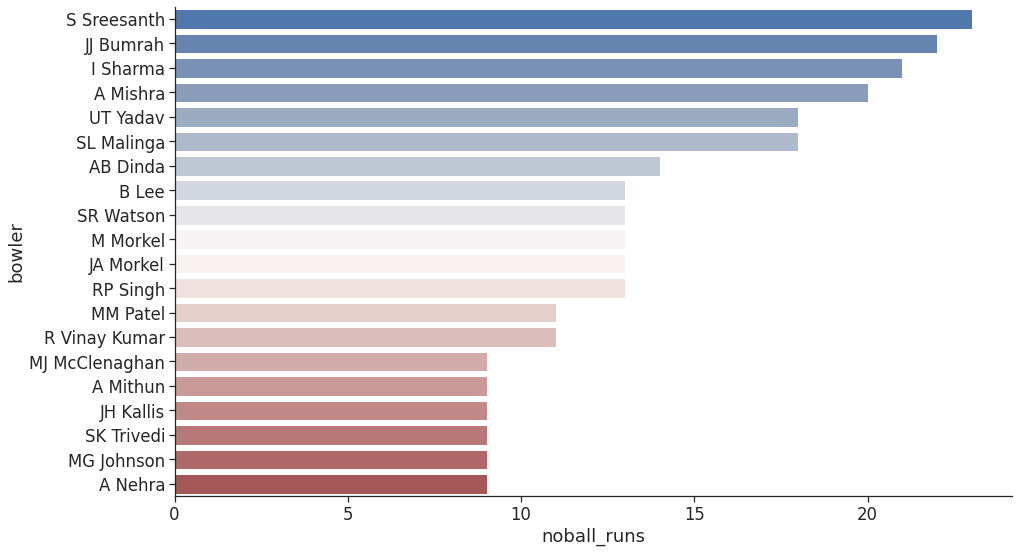

In [96]:
plt.subplots(figsize=(15,9))
sns.set_style("ticks")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = 'noball_runs', y = 'bowler', data = no_ball[:20],palette="vlag")

##Thank you !